 #### **Chapter 7 LLMs and Automation**

In [ ]:
from openai import OpenAI

# Initialize client (requires OPENAI_API_KEY in environment)
client = OpenAI()

# Prompt describing the desired script
user_request = "Give me a Python function that takes a list of SMILES strings and returns their molecular weights."

# Generate code with GPT-4
response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": user_request}],
    temperature=0  # deterministic output for reproducibility
)

# Extract generated code
generated_code = response.choices[0].message.content
print(generated_code)


To calculate the molecular weights of molecules represented by SMILES strings, you can use the RDKit library in Python. RDKit is a collection of cheminformatics and machine learning tools. It includes functionality for calculating molecular properties such as molecular weight.

Here is a Python function that takes a list of SMILES strings and returns their molecular weights:

```python
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_molecular_weights(smiles_list):
    molecular_weights = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            molecular_weights.append(Descriptors.MolWt(mol))
        else:
            molecular_weights.append(None)
    return molecular_weights
```

This function works by converting each SMILES string into a molecule object using the `MolFromSmiles` function from RDKit. Then, it calculates the molecular weight of the molecule using the `MolWt` function from RDKit's `Descri

In [ ]:
from typing import List
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_molecular_weights(smiles_list):
    molecular_weights = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            molecular_weights.append(Descriptors.MolWt(mol))
        else:
            molecular_weights.append(None)
    return molecular_weights
# Example usage
if __name__ == "__main__":
    smiles_data = ["CCO", "c1ccccc1", "INVALID"]
    print(calculate_molecular_weights(smiles_data))  # [46.07, 78.11, 0.0]



[46.069, 78.11399999999999, None]


[07:24:52] SMILES Parse Error: syntax error while parsing: INVALID
[07:24:52] SMILES Parse Error: check for mistakes around position 3:
[07:24:52] INVALID
[07:24:52] ~~^
[07:24:52] SMILES Parse Error: Failed parsing SMILES 'INVALID' for input: 'INVALID'


To illustrate how an LLM might be integrated into a data analysis workflow, consider the following code snippet. It shows how one could use the OpenAI API (with a model like GPT-4) to summarize a dataset programmatically:
Step 1: Create a sample experiment_note.txt

In [ ]:
# Write a synthetic experiment note to a local file
notes = """Title: Oxidation of Benzyl Alcohol to Benzaldehyde (TEMPO/NaOCl)

Date: 2025-09-07
Objective: Oxidize benzyl alcohol to benzaldehyde under mild conditions.

Reagents:
- Benzyl alcohol (1.00 mmol, 108 mg)
- TEMPO (5 mol%, 0.05 mmol, 7.8 mg)
- KBr (0.50 mmol, 59.5 mg)
- NaOCl (bleach, ~5% w/w, 2.0 mmol equiv.)
- Solvent: CH2Cl2 (5 mL)

Procedure:
1) Benzyl alcohol dissolved in CH2Cl2 (5 mL) at 0 °C.
2) Added TEMPO and KBr, stirred 5 min.
3) NaOCl added dropwise over 10 min, kept at 0–5 °C.
4) Stirred 1 h total, then allowed to warm to RT over final 15 min.
5) Quenched, layers separated; organic layer washed, dried (Na2SO4), concentrated.

Observations:
- Pale orange color after TEMPO addition.
- Slight exotherm during NaOCl addition; temperature maintained below 5 °C.
- TLC (hexanes/EtOAc 8:2): starting material (Rf 0.35) disappears; product spot at Rf 0.55.

Results:
- Crude oil purified by quick plug; obtained benzaldehyde (clear oil).
- Isolated yield: 76% (80 mg).
- 1H NMR (CDCl3): aldehyde proton ~9.99 ppm (s), aromatic region 7.3–7.9 ppm.

Conclusions:
- Oxidation successful with good yield under mild, selective conditions.
- Temperature control during NaOCl addition important to minimize over-oxidation.
- TEMPO/NaOCl/KBr system effective for primary alcohol oxidation."""

with open("experiment_notes.txt", "w", encoding="utf-8") as f:
    f.write(notes)

print("Wrote experiment_notes.txt")
!sed -n '1,40p' experiment_notes.txt


Wrote experiment_notes.txt
Title: Oxidation of Benzyl Alcohol to Benzaldehyde (TEMPO/NaOCl)

Date: 2025-09-07
Objective: Oxidize benzyl alcohol to benzaldehyde under mild conditions.

Reagents:
- Benzyl alcohol (1.00 mmol, 108 mg)
- TEMPO (5 mol%, 0.05 mmol, 7.8 mg)
- KBr (0.50 mmol, 59.5 mg)
- NaOCl (bleach, ~5% w/w, 2.0 mmol equiv.)
- Solvent: CH2Cl2 (5 mL)

Procedure:
1) Benzyl alcohol dissolved in CH2Cl2 (5 mL) at 0 °C.
2) Added TEMPO and KBr, stirred 5 min.
3) NaOCl added dropwise over 10 min, kept at 0–5 °C.
4) Stirred 1 h total, then allowed to warm to RT over final 15 min.
5) Quenched, layers separated; organic layer washed, dried (Na2SO4), concentrated.

Observations:
- Pale orange color after TEMPO addition.
- Slight exotherm during NaOCl addition; temperature maintained below 5 °C.
- TLC (hexanes/EtOAc 8:2): starting material (Rf 0.35) disappears; product spot at Rf 0.55.

Results:
- Crude oil purified by quick plug; obtained benzaldehyde (clear oil).
- Isolated yield: 76% (

In [ ]:
from openai import OpenAI

client = OpenAI()

# Suppose we have a text file with experiment observations
with open("experiment_notes.txt", "r", encoding="utf-8") as f:
    notes = f.read()

# Formulate a prompt for the LLM to summarize the notes
prompt = f"Summarize the key findings from the following experiment notes:\n{notes}"

# Call GPT-4 to generate a summary
response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": prompt}],
    max_tokens=150,
    temperature=0.2  # low randomness for a factual summary
)

# Extract the summary text
summary = response.choices[0].message.content
print("Experiment Summary:\n", summary)


Experiment Summary:
 The experiment successfully oxidized benzyl alcohol to benzaldehyde under mild conditions using TEMPO, KBr, and NaOCl as reagents. The process involved dissolving benzyl alcohol in CH2Cl2, adding TEMPO and KBr, then adding NaOCl dropwise. The mixture was stirred for an hour and allowed to warm to room temperature over the final 15 minutes. The resulting product was a clear oil, benzaldehyde, with a yield of 76%. The 1H NMR spectrum confirmed the presence of the aldehyde proton and aromatic region. The experiment concluded that temperature control during NaOCl addition is crucial to prevent over-oxidation and that the TEMPO/NaOCl/KBr system is


In [ ]:
from openai import OpenAI

client = OpenAI()

buggy_code = """
def get_activation_energy(temp, rate):
    import math
    # Arrhenius: rate = A * exp(-Ea/(R*T))
    return -8.314 * temp * math.log(rate)
"""

# Known issue description
error_message = "The output of get_activation_energy is incorrect for known data."

# Prompt the LLM with the buggy code and error
debug_prompt = f"Here is a function:\n{buggy_code}\nIt seems to give wrong results. {error_message}\nPlease suggest a correction."

# Request a fix from GPT-4
debug_response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": debug_prompt}],
    temperature=0
)

# Extract and print the suggestion
suggested_fix = debug_response.choices[0].message.content
print("LLM suggests:\n", suggested_fix)


LLM suggests:
 The Arrhenius equation is given by k = A * exp(-Ea/(R*T)), where k is the rate constant, A is the pre-exponential factor, Ea is the activation energy, R is the gas constant, and T is the temperature. 

If you are trying to solve for Ea, the equation should be rearranged as follows: Ea = -R*T*ln(k/A). 

However, in your function, you are not considering the pre-exponential factor (A) in your calculation. If you don't have the value of A, you can't directly calculate the activation energy from the rate constant and temperature. 

If you have the value of A, you can modify your function as follows:

```python
def get_activation_energy(temp, rate, A):
    import math
    # Arrhenius: rate = A * exp(-Ea/(R*T))
    return -8.314 * temp * math.log(rate/A)
```

If you don't have the value of A, you will need more information to calculate the activation energy. For example, if you have rate constants at two different temperatures, you can use the two-point form of the Arrhenius e

OpenAI’s recent function calling feature is built exactly for this: you give the LLM a list of function definitions (names, parameters, and docstrings explaining what they do). When the model “thinks” a function call is the best response, it outputs a JSON object representing the function name and arguments, instead of continuing in plain text. The calling program (which wraps around the LLM) then actually executes the function in the real world (or in a simulation) and returns the result to the LLM. This mechanism ensures that the LLM can’t perform arbitrary operations; it’s constrained to the tools you allow, making its actions more predictable and secure. To ground this in code, here’s a simplified example of setting up function calling for a hypothetical lab scenario using OpenAI’s API:

In [ ]:
from openai import OpenAI
import json

client = OpenAI()

# Define the function (tool) schema
tools = [
    {
        "type": "function",
        "function": {
            "name": "set_temperature",
            "description": "Set the temperature of a device to a target value (in °C).",
            "parameters": {
                "type": "object",
                "properties": {
                    "device": {
                        "type": "string",
                        "description": "Which device to set (e.g., 'heater1', 'oil_bath')."
                    },
                    "temperature": {
                        "type": "number",
                        "description": "Target temperature in Celsius."
                    }
                },
                "required": ["device", "temperature"],
                "additionalProperties": False
            },
        },
    }
]

user_input = "Heat the oil bath to 60 °C."

# Ask the model; let it decide whether to call the tool
resp = client.chat.completions.create(
    model="gpt-4o-mini",  # any tool-capable chat model works (e.g., gpt-4o, gpt-4o-mini)
    messages=[{"role": "user", "content": user_input}],
    tools=tools,
    tool_choice="auto",
    temperature=0
)

msg = resp.choices[0].message

if msg.tool_calls:
    # Handle the first tool call (you can loop if multiple)
    call = msg.tool_calls[0]
    func_name = call.function.name
    try:
        args = json.loads(call.function.arguments or "{}")
    except json.JSONDecodeError:
        args = {}
    print(f"Calling function: {func_name} with args {args}")

    # Example: your actual function implementation
    def set_temperature(device: str, temperature: float):
        print(f"[DEVICE] {device} set to {temperature} °C")

    # Dispatch
    if func_name == "set_temperature":
        set_temperature(**args)
else:
    # Model decided not to call a tool; just print its reply
    print("Model reply:", msg.content or "(no content)")


Calling function: set_temperature with args {'device': 'oil_bath', 'temperature': 60}
[DEVICE] oil_bath set to 60 °C


## 7.2.2 Multimodal Interactions: Beyond Text

The term multimodal LLM often refers to models like GPT-4 (Vision) which can take image inputs in addition to text.97,98 Indeed, th

and explain what’s in them.99–102 For instance, an image of a chemical flask can be passed to GPT-4 to identify a color change in the solution. In the code below, we load an image file, encode it in base64 (as a data URL), and include it in the chat prompt for GPT-4. The assistant’s response (e.g., noting “the solution appears blue”) could then be used by the lab’s LLM agent for decision-making or logging the observation.

✅ Saved flask_image.jpg


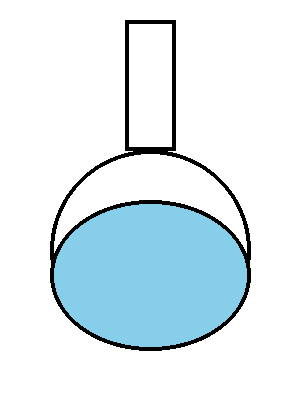

In [ ]:
from PIL import Image, ImageDraw

# Create blank canvas
img = Image.new("RGB", (300, 400), "white")
draw = ImageDraw.Draw(img)

# Draw a round-bottom flask outline
draw.ellipse((50, 150, 250, 350), outline="black", width=4)

# Fill the liquid region (blue liquid)
draw.ellipse((50, 200, 250, 350), fill="skyblue", outline="black", width=4)

# Draw the neck of the flask
draw.rectangle((125, 20, 175, 150), outline="black", width=4, fill="white")

# Save flask image
img.save("flask_image.jpg")
print("✅ Saved flask_image.jpg")

display(img)

In [ ]:
from openai import OpenAI
import base64, pathlib, os

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY", "sk-your-key-here"))

# Read and encode
p = pathlib.Path("flask_image.jpg")
with open(p, "rb") as f:
    b64 = base64.b64encode(f.read()).decode("utf-8")
data_url = f"data:image/jpeg;base64,{b64}"

# Build vision messages
messages = [
    {"role": "system", "content": "You are a lab assistant AI skilled in image analysis."},
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "The attached image shows a flask solution. What color is the liquid?"},
            {"type": "image_url", "image_url": {"url": data_url}}
        ]
    }
]

# Call GPT-4o vision
resp = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    temperature=0
)

print("GPT analysis:", resp.choices[0].message.content)


GPT analysis: The liquid in the flask is blue.


Multimodal interaction isn’t just about vision; it also includes audio (like voice commands or listening for alarms in the lab) and possibly other sensors (vibration, smell detectors, etc.). In such

system, a chemist could verbally instruct the lab AI, and the AI (using LLM plus speech recognition and synthesis) would execute the tasks and talk back. This adds a layer of convenience that the chemist doesn’t even need to type, they can just speak, which is natural and hands-free (imagine talking to the fume hood while your hands are busy). It’s also another modality: natural language in audio form. For example, a voice command “Start titration at 80 degrees” can be recorded and converted into text for the LLM agent to act on. In the code below, we open an audio file containing the spoken command and use openai.Audio.transcribe with the “whisper-1” model to get the transcription. This transcribed text (e.g., “Start titration at 80 degrees.”) can then be passed into the agent’s prompt or logic for execution in the automated lab workflow.

In [ ]:
# --- Setup: install deps (Colab) ---
!pip -q install --upgrade openai gTTS pydub
!apt -y -qq install ffmpeg

# --- 1) Generate a voice command WAV file ---
from gtts import gTTS
from pydub import AudioSegment

TEXT = "Turn on the heater to sixty degrees."
# Save TTS to MP3 first (gTTS outputs mp3), then convert to WAV
gTTS(TEXT, lang="en").save("voice_command.mp3")
AudioSegment.from_file("voice_command.mp3").export("voice_command.wav", format="wav")

print("✅ Generated voice_command.wav")

# --- 2) Display (play) the audio inline ---
from IPython.display import Audio, display
display(Audio("voice_command.wav"))

# --- 3) Transcribe with OpenAI (Whisper) ---
import os
from openai import OpenAI

# Make sure your API key is available (set this securely or via Colab secrets)
# os.environ["OPENAI_API_KEY"] = "sk-your-key-here"

client = OpenAI()

with open("voice_command.wav", "rb") as audio_file:
    transcript = client.audio.transcriptions.create(
        model="whisper-1",       # or "gpt-4o-transcribe" if available to you
        file=audio_file
    )

voice_command_text = transcript.text
print("Transcribed voice command:", voice_command_text)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 7.6 MB/s eta 0:00:00
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


✅ Generated voice_command.wav


Transcribed voice command: Turn on the heater to 60 degrees.
